In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras import layers, models

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

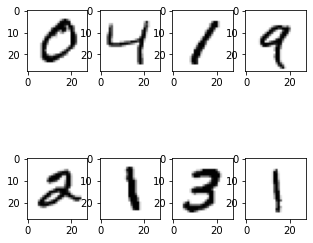

In [ ]:
w = 10
h = 10
rows = 2
columns = 4
fig = plt.figure(figsize=(5, 5))

for i in range(1, columns * rows + 1):
    digit = train_images[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(digit, cmap=plt.cm.binary)

plt.show()

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [ ]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
train_images.shape, test_images.shape

((60000, 784), (10000, 784))

In [ ]:
# to_categorical: converts class vector to binary class matrix, used with categorical_crossentropy

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels.shape, test_labels.shape

((60000, 10), (10000, 10))

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
network = models.Sequential()

network.add(layers.Dense(
    units=512, 
    # Output units, connected to the to the previous layer.
    # Every unit in the layer is connected to every unit in the previous layer, 
    # through a single connection that carries a weight (which can be positive or negative).
    # The output from a given unit is the weighted sum of the input it receives from the previous layer, 
    # which is then passed through a nonlinear activation function before being sent to the following layer. 
    # The activation function is critical to ensure the neural network is able to learn complex functions and doesn’t just output a linear combination of its input.
    activation='relu', 
    input_shape=(28 * 28,) # weight matrix (28*28, 512)
))

# network.add(layers.Dropout(0.5))
# network.add(layers.Dense(
#    units=512/4, # output units    
#    activation='relu'
# ))

network.add(layers.Dropout(0.1))

network.add(layers.Dense(
    units=10, # output units
    activation='softmax'
))

In [ ]:
network.compile(
    optimizer='rmsprop', # How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction. 
    loss='categorical_crossentropy', # The mechanism through which the network will update itself based on the data it sees and its loss function. 
    metrics=['accuracy'] # To monitor during training and testing
)

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0064 - accuracy: 0.9981
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0059 - accuracy: 0.9980
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0057 - accuracy: 0.9983
Epoch 4/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0042 - accuracy: 0.9985
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0040 - accuracy: 0.9988


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0856 - accuracy: 0.9829


0.9829000234603882

In [ ]:
img = test_images[0]
img = np.array([img])
predictions_single = network.predict(img)

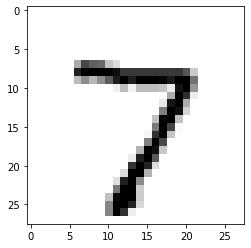

In [ ]:
digit = np.reshape(test_images[0], (28, 28))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

7